# 1 - Preparación del dataset

## 0. Imports

In [7]:
# Manejo de datos
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# Utilidades
import sys
sys.path.append("..\..")
from package_utilities import clean_text_field

#Otros
import re # Expresiones regulares
import string

# Stopwords
import nltk
from nltk.corpus import stopwords


## 1. Lectura del conjunto de datos

In [8]:
df = pd.read_csv('../../data/originals/train.csv')
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


## 2. Limpieza del conjunto de datos

In [9]:
df_filtered = clean_text_field(df)
df_filtered

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this earthquake Ma...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask Canada,1
2,5,NaN,NaN,All residents asked to shelter in place are be...,1
3,6,NaN,NaN,13000 people receive wildfires evacuation orde...,1
4,7,NaN,NaN,Just got sent this photo from Ruby Alaska as s...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,ariaahrary TheTawniest The out of control wild...,1
7610,10871,NaN,NaN,M194 0104 UTC5km S of Volcano Hawaii httptcozD...,1
7611,10872,NaN,NaN,Police investigating after an ebike collided w...,1


In [10]:
df_filtered.drop(axis=1, columns=["id", "keyword", "location"], inplace=True)
df_filtered

,text,target
0,Our Deeds are the Reason of this earthquake Ma...,1
1,Forest fire near La Ronge Sask Canada,1
2,All residents asked to shelter in place are be...,1
3,13000 people receive wildfires evacuation orde...,1
4,Just got sent this photo from Ruby Alaska as s...,1
...,...,...
7608,Two giant cranes holding a bridge collapse int...,1
7609,ariaahrary TheTawniest The out of control wild...,1
7610,M194 0104 UTC5km S of Volcano Hawaii httptcozD...,1
7611,Police investigating after an ebike collided w...,1


In [13]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    7613 non-null   object
 1   target  7613 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 119.1+ KB


### Guardado

In [14]:
df_filtered.to_parquet("../../data/modifications/filtered.parquet", engine='pyarrow')

ImportError: Missing optional dependency 'pyarrow'. pyarrow is required for parquet support. Use pip or conda to install pyarrow.

## 3. Procesado de datos

## 4. Vectorización del conjunto de datos

In [ ]:
Y_train = X_train_prep['target']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train_prep['text'])

In [ ]:
X_train = X_train.toarray()

In [ ]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X_test = vectorizer.transform(X_test_prep['text'])
X_test = X_test.toarray()

## 5. División del conjunto de datos

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.15)

In [ ]:
print("Longitud subcojunto de entrenamiento: ", len(X_train))
print("Longitud subconjunto de validación: ", len(X_val))
print("Longitud subconjutno de pruebas: ", len(X_test))

Longitud subcojunto de entrenamiento:  6471
Longitud subconjunto de validación:  1142
Longitud subconjutno de pruebas:  3263


## 6. Construcción del modelo

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(
    optimizer='adam', 
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision']
)

In [ ]:
history = model.fit(
    X_train,
    Y_train,
    epochs=20,
    batch_size=1024,
    validation_data=(X_val, Y_val))

Epoch 1/20
7/7 [==============================] - 4s 257ms/step - loss: 0.6921 - accuracy: 0.5579 - precision: 0.4731 - val_loss: 0.6900 - val_accuracy: 0.5762 - val_precision: 0.0000e+00
Epoch 2/20
7/7 [==============================] - 1s 104ms/step - loss: 0.6878 - accuracy: 0.5826 - precision: 0.8909 - val_loss: 0.6850 - val_accuracy: 0.5779 - val_precision: 1.0000
Epoch 3/20
7/7 [==============================] - 1s 112ms/step - loss: 0.6808 - accuracy: 0.6061 - precision: 0.9685 - val_loss: 0.6778 - val_accuracy: 0.6077 - val_precision: 0.9737
Epoch 4/20
7/7 [==============================] - 1s 109ms/step - loss: 0.6710 - accuracy: 0.6487 - precision: 0.9622 - val_loss: 0.6689 - val_accuracy: 0.6445 - val_precision: 0.9875
Epoch 5/20
7/7 [==============================] - 1s 95ms/step - loss: 0.6586 - accuracy: 0.6823 - precision: 0.9656 - val_loss: 0.6588 - val_accuracy: 0.6786 - val_precision: 0.9606
Epoch 6/20
7/7 [==============================] - 1s 107ms/step - loss: 0.643

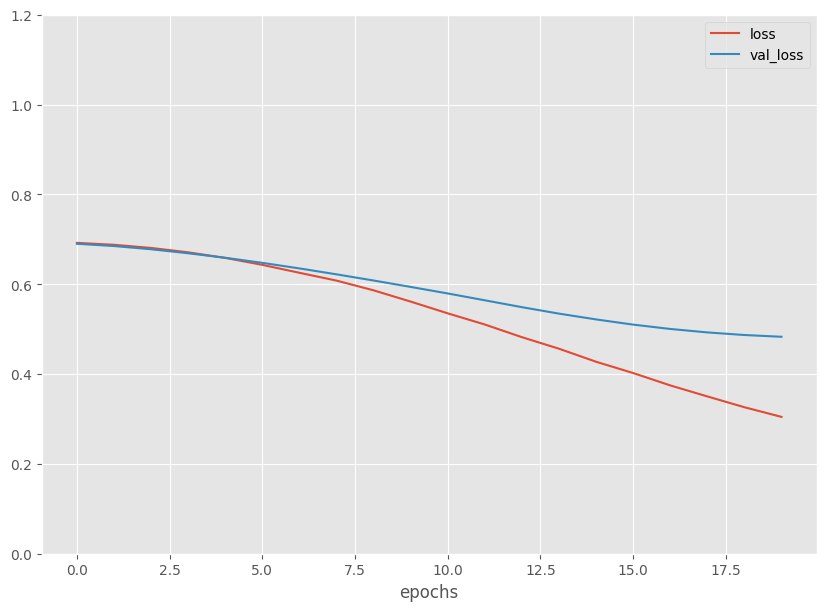

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)[['loss', 'val_loss']].plot(figsize=(10, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1.2)
plt.xlabel("epochs")
plt.show()

## 7. Evaluación del modelo

In [ ]:
Y_pred = model.predict(X_test).round(0)
Y_pred

102/102 [==============================] - 0s 4ms/step


array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [ ]:
for i in range(30):
    print("{} - {}".format(X_test_prep['text'][i], Y_pred[i]))

Just happened a terrible car crash - [1.]
Heard about earthquake is different cities stay safe everyone - [0.]
there is a forest fire at spot pond geese are fleeing across the street I cannot save them all - [1.]
Apocalypse lighting Spokane wildfires - [1.]
Typhoon Soudelor kills 28 in China and Taiwan - [1.]
Were shakingIts an earthquake - [1.]
Theyd probably still show more life than Arsenal did yesterday eh EH - [0.]
Hey How are you - [0.]
What a nice hat - [0.]
Fuck off - [0.]
No I dont like cold - [0.]
NOOOOOOOOO Dont do that - [0.]
No dont tell me that - [0.]
What if - [0.]
Awesome - [0.]
Birmingham Wholesale Market is ablaze BBC News  Fire breaks out at Birminghams Wholesale Market httptcoirWqCEZWEU - [1.]
sunkxssedharry will you wear shorts for race ablaze  - [0.]
PreviouslyOnDoyinTv Toke MakinwaÛªs marriage crisis sets Nigerian Twitter ablaze httptcoCMghxBa2XI - [1.]
Check these out httptcorOI2NSmEJJ httptco3Tj8ZjiN21 httptcoYDUiXEfIpE httptcoLxTjc87KLS nsfw - [0.]
PSA IÛªm 